## Heat map

* 큰값은 따뜻한 색, 작은값은 차가운 색
* matshow 를 통해 heat map 표현
* 보간법에 따른 표현법 종류

     1981  1982  1983  1984  1985  1986  1987  1988  1989  1990
0    20.7  17.0  18.4  19.5  13.3  12.9  12.3  15.3  14.3  14.8
1    17.9  15.0  15.0  17.1  15.2  13.8  13.8  14.3  17.4  13.3
2    18.8  13.5  10.9  17.1  13.1  10.6  15.3  13.5  18.5  15.6
3    14.6  15.2  11.4  12.0  12.7  12.6  15.6  15.0  16.8  14.5
4    15.8  13.0  14.8  11.0  14.6  13.7  16.2  13.6  11.5  14.3
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...
360  15.5  15.3  13.9  12.2  11.5  14.6  16.2   9.5  13.3  14.0
361  13.3  16.3  11.1  12.0  10.8  14.2  14.2  12.9  11.7  13.6
362  15.6  15.8  16.1  12.6  12.0  13.2  14.3  12.9  10.4  13.5
363  15.2  17.7  20.4  16.0  16.3  11.7  13.3  14.8  14.4  15.7
364  17.4  16.3  18.0  16.4  14.4  17.2  16.7  14.1  12.7  13.0

[365 rows x 10 columns]
       0     1     2     3     4     5     6     7     8     9    ...   355  \
1981  20.7  17.9  18.8  14.6  15.8  15.8  15.8  17.4  21.8  20.0  ...  15.0   
1982  17.0  15.0  13.5  15.2  13.0  12.5  14.1  1

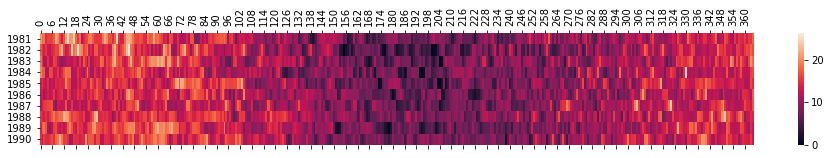

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

series = pd.read_csv('daily-minimum-temperatures.csv', header = 0, index_col=0,
                 parse_dates =True, squeeze=True)
groups = series.groupby(pd.Grouper(freq='A'))
years = pd.DataFrame()
for name , group in groups:
    years[name.year] = group.values
print(years)
print(years.T)

plt.matshow(years.T, interpolation=None, aspect='auto') #asepct는 종횡비,
sns.heatmap(years.T)
plt.show()

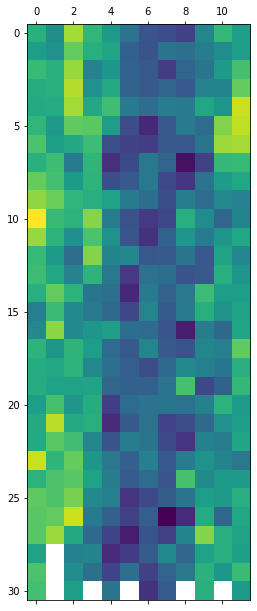

In [15]:
one_year = series['1990']
groups_M = one_year.groupby(pd.Grouper(freq='M'))
months = pd.concat([pd.DataFrame(x[1].values) for x in groups_M], axis=1)

months = pd.DataFrame(months)
months.columns = range(1,13)
plt.matshow(months, interpolation=None, aspect= 'auto')
plt.show()

# 흰 박스는 홀수달의 온도가 빠져있는 모습

## Lag Scatter Plots

* 현재 관측치와 이전의 데이터와의 관계를 파악할 필요가 있다.
* 상정도라 한다.
* x축에 시간 t의 관측치, y축에 다음시간 단계 t+1의 관측치를 표시한다.

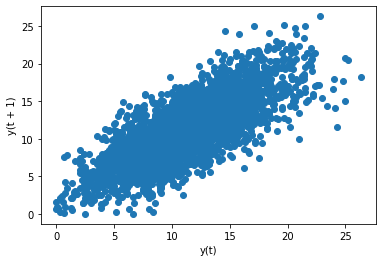

In [20]:
from pandas.plotting import lag_plot
lag_plot(series)
plt.show()

* 여러 지연에 따른 산점도도 sublot을 이용해서 그릴수 있다.

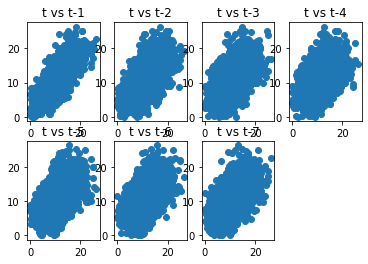

In [48]:
lags = 7
values = pd.DataFrame(series.values)
columns = [values]

for i in range(1,lags+1):
    columns.append(values.shift(i))

dataframe = pd.concat(columns, axis=1)
dataframe.columns = ['t', 't-1', 't-2', 't-3', 't-4', 't-5', 't-6', 't-7']

for i in range(1, (lags+1)):
    ax = plt.subplot(240 + i)
    ax.set_title('t vs t-' + str(i))
    plt.scatter(x=dataframe['t'].values, y=dataframe['t-'+str(i)].values)
plt.show()


## Autocorrelation Plots

* -1 <= 자기상관계수 <= 1
* 아래 예시를 통해 lag가 365*i 일때마다 높은값을 보여준다. 월-일은 같지만 년도만 다를떄의 온도의 상관관계이기 때문이다.
* 한 변수 내에서 값들관의 상관관계
* 변수 하나만 줘도 알아서 lag값을 취해주고 계산함

C:\Users\jh\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:411: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


<function matplotlib.pyplot.show(close=None, block=None)>

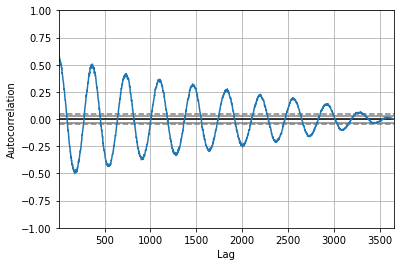

In [49]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(series)
plt.show

# 0 위아래 점선은 상관관계가 없다는것을 표현. lag 단위가 일수 이므로 365일마다 상관관계가 높음

## Ch : 7. Resampling and interpolation

resampling
* Upsampling : 빈도를 증가시키는것. 주기 사이의 데이터를  upsample해서 늘리고interpolation 을 통하여 채워넣음 ex) 분 -> 초
* Downsampling : 빈도를 감소시키는것 ex) 일 -> 월

한달 주기로 있는 샴푸 판매량을 upsampling 해서 일단위로 만들것

In [88]:
import datetime

def parser(x):
    return pd.datetime.strptime('190'+ x, '%Y-%m')
series = pd.read_csv('shampoo.csv', header= 0, index_col= 0, parse_dates= True,
squeeze= True , date_parser= parser)
upsampled = series.resample('D'). first()
print(upsampled. head(32))

Month
1901-01-01    266.0
1901-01-02      NaN
1901-01-03      NaN
1901-01-04      NaN
1901-01-05      NaN
1901-01-06      NaN
1901-01-07      NaN
1901-01-08      NaN
1901-01-09      NaN
1901-01-10      NaN
1901-01-11      NaN
1901-01-12      NaN
1901-01-13      NaN
1901-01-14      NaN
1901-01-15      NaN
1901-01-16      NaN
1901-01-17      NaN
1901-01-18      NaN
1901-01-19      NaN
1901-01-20      NaN
1901-01-21      NaN
1901-01-22      NaN
1901-01-23      NaN
1901-01-24      NaN
1901-01-25      NaN
1901-01-26      NaN
1901-01-27      NaN
1901-01-28      NaN
1901-01-29      NaN
1901-01-30      NaN
1901-01-31      NaN
1901-02-01    145.9
Freq: D, Name: Sales, dtype: float64


<ipython-input-88-86848667ac29>:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  return pd.datetime.strptime('190'+ x, '%Y-%m')


Month
1901-01-01    266.000000
1901-01-02    262.125806
1901-01-03    258.251613
1901-01-04    254.377419
1901-01-05    250.503226
                 ...    
1903-11-27    638.153333
1903-11-28    640.340000
1903-11-29    642.526667
1903-11-30    644.713333
1903-12-01    646.900000
Freq: D, Name: Sales, Length: 1065, dtype: float64


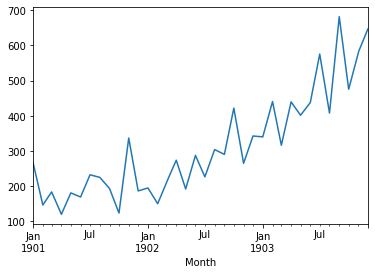

In [90]:
interpolated = upsampled.interpolate(metheod='time')
print(interpolated)
interpolated.plot()
plt.show()

# 보간 방법에는 다항식 or 스플라인 방법이 있따.